In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
# Memuat file Excel
df = pd.read_excel('new_dataset_fix.xlsx') 

In [3]:
# Memilih kolom numerik yang relevan untuk klustering
kolom_numerik = [
    'Kunjungan PerMinggu',
    'Waktu Rata-Rata Situs(menit)',
    'Produk Dilihat'
]

In [4]:
# Membersihkan kolom numerik dengan mengubah string dengan koma menjadi float
for kolom in kolom_numerik:
    df[kolom] = df[kolom].replace(',', '.', regex=True).astype(float) 

In [5]:
# Praproses data dengan menstandarkan
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(df[kolom_numerik]) 

In [6]:
# Menerapkan K-Means klustering dengan 2 kluster
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_distandarkan) 
df['Kluster'] = kmeans.labels_


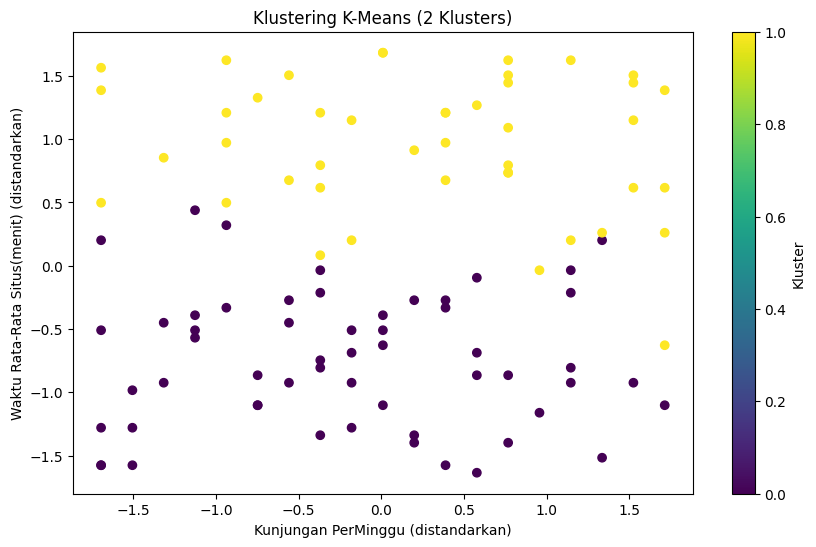

In [7]:
# Plot kluster
plt.figure(figsize=(10, 6))
plt.scatter(
    data_distandarkan[:, 0],
    data_distandarkan[:, 1],
    c=df['Kluster'],
    cmap='viridis' 
)
plt.xlabel(f'{kolom_numerik[0]} (distandarkan)') 
plt.ylabel(f'{kolom_numerik[1]} (distandarkan)')
plt.title('Klustering K-Means (2 Klusters)')
plt.colorbar(label='Kluster')
plt.show()

In [8]:
# Menyimpan dataframe dengan label kluster
df.to_excel('Hasil_Kluster.xlsx', index=False) 

In [9]:
# Menampilkan beberapa baris pertama dari dataframe dengan label kluster
print(df.head()) 

   Kunjungan PerMinggu  Waktu Rata-Rata Situs(menit)  Produk Dilihat  Kluster
0                  6.0                          11.0             1.0        0
1                 12.0                          24.0             4.0        0
2                 13.0                          18.0             6.0        0
3                  9.0                           8.0             2.0        0
4                 10.0                          58.0             3.0        1


In [10]:
# Membaca kembali file hasil kluster
df = pd.read_excel("Hasil_Kluster.xlsx", sheet_name="Sheet1") 
df

,Kunjungan PerMinggu,Waktu Rata-Rata Situs(menit),Produk Dilihat,Kluster
0,6,11,1,0
1,12,24,4,0
2,13,18,6,0
3,9,8,2,0
4,10,58,3,1
...,...,...,...,...
95,5,46,3,1
96,17,4,2,0
97,19,53,9,1
98,1,3,6,0


In [11]:
# Memisahkan fitur (x) dan target (y)
x = df.iloc[:, 0:3]
y = df.iloc[:, 3] 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE 

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [14]:
from sklearn.preprocessing import StandardScaler 

In [15]:
# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train) 

In [16]:
# Normalisasi data (opsional, terutama untuk kernel RBF)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test  = scaler.transform(x_test)

In [17]:
# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using the training data
model.fit(x_train, y_train)

GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score, classification_report 


In [19]:
# Make predictions on the test data
y_pred = model.predict(x_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report   = classification_report(y_test, y_pred, zero_division=1) 

In [20]:
# Cetak hasil
print("Accuracy:", accuracy)
print("Classification Report:\n", report) 

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



In [21]:
# Dictionary untuk pemetaan label numerik ke label teks
label_map = {
    0: 'Cluster 0',
    1: 'Cluster 1'
}

In [22]:
# Gabungkan data uji, hasil prediksi, dan kolom yang diperlukan
results_df = pd.DataFrame({
    'ActualCluster':    y_test.values,
    'PredictedCluster': y_pred 
})

In [23]:
# Mengganti nilai label numerik dengan label teks menggunakan map
results_df['ActualCluster']    = results_df['ActualCluster'].map(label_map)
results_df['PredictedCluster'] = results_df['PredictedCluster'].map(label_map) 

In [24]:
# Simpan ke file Excel
file_path = 'Hasil_Prediksi_NaiveBayes.xlsx'
results_df.to_excel(file_path, index=False)
print(f"Hasil prediksi telah diekspor ke file: {file_path}") 

Hasil prediksi telah diekspor ke file: Hasil_Prediksi_NaiveBayes.xlsx


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Buat model Random Forest
model = RandomForestClassifier(random_state=42) 

In [27]:
# Latih model menggunakan data pelatihan yang telah di-resample
model.fit(x_train, y_train) 

RandomForestClassifier(random_state=42)

In [28]:
# Prediksi pada data uji
y_pred = model.predict(x_test) 

In [29]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report   = classification_report(y_test, y_pred, zero_division=1) 

In [30]:
# Cetak hasil
print("Accuracy:", accuracy)
print("Classification Report:\n", report) 

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



In [31]:
# Dictionary untuk pemetaan label numerik ke label teks (cluster)
label_map = {              
    0: 'Cluster 0',        
    1: 'Cluster 1'      
}

In [32]:
# Gabungkan actual vs prediksi ke DataFrame
results_rf = pd.DataFrame({                 
    'ActualCluster':    y_test.values,      
    'PredictedCluster': y_pred              
}) 

In [33]:
# Mengganti nilai numerik dengan teks
results_rf['ActualCluster']    = results_rf['ActualCluster'].map(label_map)   
results_rf['PredictedCluster'] = results_rf['PredictedCluster'].map(label_map) 


In [34]:
# Simpan ke file Excel
file_path = 'Hasil_Prediksi_RandomForest.xlsx' 
results_rf.to_excel(file_path, index=False)    
print(f"Hasil prediksi telah diekspor ke file: {file_path}") 

Hasil prediksi telah diekspor ke file: Hasil_Prediksi_RandomForest.xlsx


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report 


In [36]:
# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train) 

In [37]:
# Normalisasi data (opsional, terutama untuk kernel RBF)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) 

In [38]:
# Inisialisasi model SVM dengan kernel RBF
model = SVC(kernel='rbf', random_state=42) 

In [39]:
# Latih model menggunakan data pelatihan
model.fit(x_train, y_train) 

SVC(random_state=42)

In [40]:
# Prediksi pada data uji 
y_pred = model.predict(x_test)

In [41]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report   = classification_report(y_test, y_pred, zero_division=1) 

In [42]:
# Cetak hasil
print("Accuracy:", accuracy)
print("Classification Report:\n", report) 

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



In [43]:
# Dictionary untuk pemetaan label numerik ke teks cluster
label_map = {                
    0: 'Cluster 0',          
    1: 'Cluster 1'           
}

In [44]:
# Gabungkan actual vs prediksi ke DataFrame
results_svm = pd.DataFrame({               
    'ActualCluster':    y_test.values,      
    'PredictedCluster': y_pred              
})

In [45]:
# Mapping numerik ke teks
results_svm['ActualCluster']    = results_svm['ActualCluster'].map(label_map)   
results_svm['PredictedCluster'] = results_svm['PredictedCluster'].map(label_map) 

In [46]:
# Simpan ke file Excel
file_path = 'Hasil_Prediksi_SVM.xlsx'      
results_svm.to_excel(file_path, index=False) 
print(f"Hasil prediksi telah diekspor ke file: {file_path}") 

Hasil prediksi telah diekspor ke file: Hasil_Prediksi_SVM.xlsx
